In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [77]:
metro_ts = pd.read_csv('metro_time_series.csv')
metro_ts = metro_ts[metro_ts['RegionName'] == '29420']
metro_ts = metro_ts.filter(['Date', 'RegionName', 'ZHVI_AllHomes'])
metro_ts.dropna(inplace=True)
metro_ts = metro_ts.set_index('Date')
metro_ts.index = pd.to_datetime(metro_ts.index)
ax = metro_ts[metro_ts.index < '2006-07']
ax

,RegionName,ZHVI_AllHomes
Date,,
1996-04-30,29420,85700.0
1996-05-31,29420,85000.0
1996-06-30,29420,84700.0
1996-07-31,29420,84300.0
1996-08-31,29420,84200.0
...,...,...
2006-02-28,29420,233900.0
2006-03-31,29420,235600.0
2006-04-30,29420,237400.0


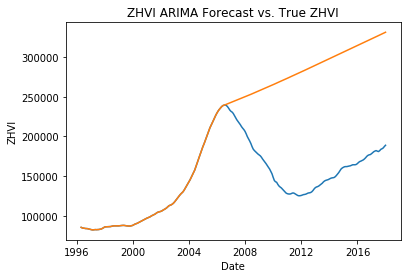

In [81]:
model = ARIMA(ax['ZHVI_AllHomes'].values, order = (5, 1, 0))
model_fit = model.fit(disp = 0)
forecast = model_fit.forecast(steps = len(metro_ts['ZHVI_AllHomes'].values) - len(ax['ZHVI_AllHomes'].values))
results = forecast[0]
metro_ts['ARIMA'] = np.append(ax['ZHVI_AllHomes'].values, results)
plt.plot(metro_ts['ZHVI_AllHomes'])
plt.plot(metro_ts['ARIMA'])
plt.ylabel('ZHVI')
plt.xlabel('Date')
plt.title('ZHVI ARIMA Forecast vs. True ZHVI')
plt.show()

